<a href="https://colab.research.google.com/github/Hussur/PatternFlow/blob/topic-recognition/recognition/s4548700/yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# clone darknet repo from original github
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [11]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

[Errno 20] Not a directory: 'darknet'
/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [23]:
# make darknet
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1150:10: note: ...thi

In [ ]:
#visualization function
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [12]:
#connect with google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [13]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'Colab Notebooks'	     'My Drive'   yolov3_custom_last.weights
 darknet		      obj.zip
 ISIC-2017_Test_v2_Data.zip   yolov3


In [14]:
# copy the .zip file into the root directory of cloud VM
!cp /content/gdrive/MyDrive/obj.zip ../

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d /content/darknet/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/darknet/data/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000103.jpg  
  inflating: /content/darknet/data/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000103.txt  
  inflating: /content/darknet/data/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000104.jpg  
  inflating: /content/darknet/data/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000104.txt  
  inflating: /content/darknet/data/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000105.jpg  
  inflating: /content/darknet/data/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000105.txt  
  inflating: /content/darknet/data/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000107.jpg  
  inflating: /content/darknet/data/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000107.txt  
  inflating: /content/darknet/data/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000108.jpg  
  inflating: /content/darknet/data/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000108.txt  
  inflating: /content/darknet/data/ISIC2018_Task1-2_Trainin

In [ ]:
#copy the updated generate_train to darknet
!cp /content/gdrive/MyDrive/yolov3/generate_train.py /content/darknet
!python generate_train.py

In [16]:
#copy other updated config files
!cp /content/gdrive/MyDrive/yolov3/obj.names /content/darknet/data
!cp /content/gdrive/MyDrive/yolov3/obj.data /content/darknet/data 
!cp /content/gdrive/MyDrive/yolov3/yolov3_customs.cfg /content/darknet/cfg 

In [18]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2021-10-31 02:59:18--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2021-10-31 02:59:18--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  40.8MB/s    in 4.2s    

2021-10-31 02:59:22 (37.2 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
# train your custom detector
!./darknet detector train data/obj.data /content/darknet/cfg/yolov3_customs.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.706688), count: 4, class_loss = 0.637568, iou_loss = 0.376039, total_loss = 1.013607 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000090, iou_loss = 0.000000, total_loss = 0.000090 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000033, iou_loss = 0.000000, total_loss = 0.000033 
 total_bbox = 75413, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.480631), count: 4, class_loss = 0.578861, iou_loss = 0.754392, total_loss = 1.333253 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.003589, iou_loss = 0.000000, total_loss = 0.003589 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00

In [ ]:
#output the final results
!./darknet detector map /content/darknet/data/obj.data /content/darknet/cfg/yolov3_customs.cfg /content/gdrive/MyDrive/yolov3/backup/yolov3_customs_3000.weights -ext_output -dont_show </content/darknet/data/test.txt> result.txt -iou_thresh 0.8

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcu

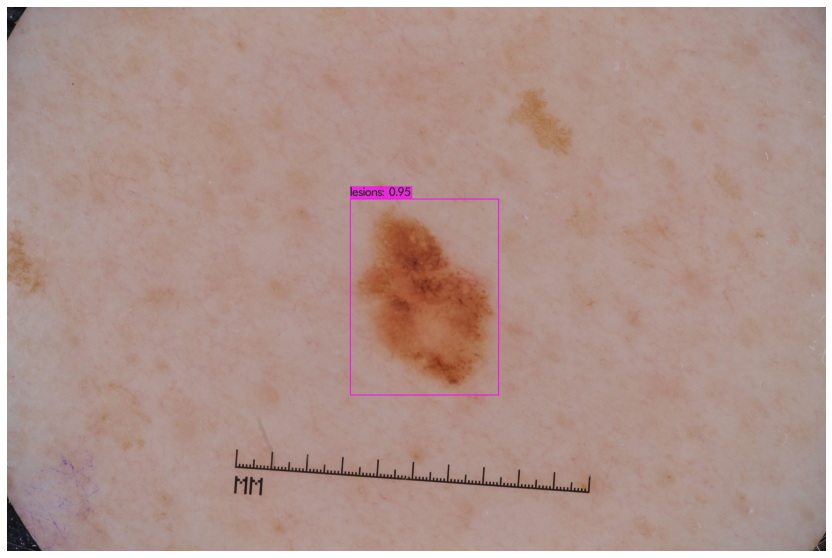

In [32]:
#output the test prediction example
!./darknet detector test /content/darknet/data/obj.data /content/darknet/cfg/yolov3_customs.cfg /content/gdrive/MyDrive/yolov3/backup/yolov3_customs_3000.weights /content/darknet/data/test/ISIC_0013766.jpg -thresh 0.8
imShow('predictions.jpg')

In [19]:
#copy test data
!cp /content/gdrive/MyDrive/ISIC-2017_Test_v2_Data.zip ../

In [20]:
#unzip test data
!unzip ../ISIC-2017_Test_v2_Data.zip -d /content/darknet/data

Archive:  ../ISIC-2017_Test_v2_Data.zip
   creating: /content/darknet/data/ISIC-2017_Test_v2_Data/
  inflating: /content/darknet/data/ISIC-2017_Test_v2_Data/ISIC_0012086.jpg  
  inflating: /content/darknet/data/ISIC-2017_Test_v2_Data/ISIC_0012086.txt  
  inflating: /content/darknet/data/ISIC-2017_Test_v2_Data/ISIC_0012092.jpg  
  inflating: /content/darknet/data/ISIC-2017_Test_v2_Data/ISIC_0012092.txt  
  inflating: /content/darknet/data/ISIC-2017_Test_v2_Data/ISIC_0012095.jpg  
  inflating: /content/darknet/data/ISIC-2017_Test_v2_Data/ISIC_0012095.txt  
  inflating: /content/darknet/data/ISIC-2017_Test_v2_Data/ISIC_0012134.jpg  
  inflating: /content/darknet/data/ISIC-2017_Test_v2_Data/ISIC_0012134.txt  
  inflating: /content/darknet/data/ISIC-2017_Test_v2_Data/ISIC_0012136.jpg  
  inflating: /content/darknet/data/ISIC-2017_Test_v2_Data/ISIC_0012136.txt  
  inflating: /content/darknet/data/ISIC-2017_Test_v2_Data/ISIC_0012147.jpg  
  inflating: /content/darknet/data/ISIC-2017_Test_v2_D

In [25]:
#cp generate_test
!cp /content/gdrive/MyDrive/yolov3/generate_test.py /content/darknet
!python /content/darknet/generate_test.py